In [5]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.20.3


In [13]:
import numpy as np # linear algebra
import scipy
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # using for plots
import seaborn as sns #using for plots
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.model_selection import train_test_split # split train and test sets
from sklearn.preprocessing import StandardScaler # for scaling 
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')



In [7]:
# Load dataset
path ="Iris.csv"
dataset = pd.read_csv(path)

In [8]:
# shape
print(dataset.shape)

(150, 6)


In [9]:
# head
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
help(scipy)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
dataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
#Remove a column from the data
dataset = dataset.drop('Id',axis=1)

KeyError: "['Id'] not found in axis"

In [20]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
dataset.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [24]:
# class distribution
dataset.groupby('Species').size()
# dataset.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

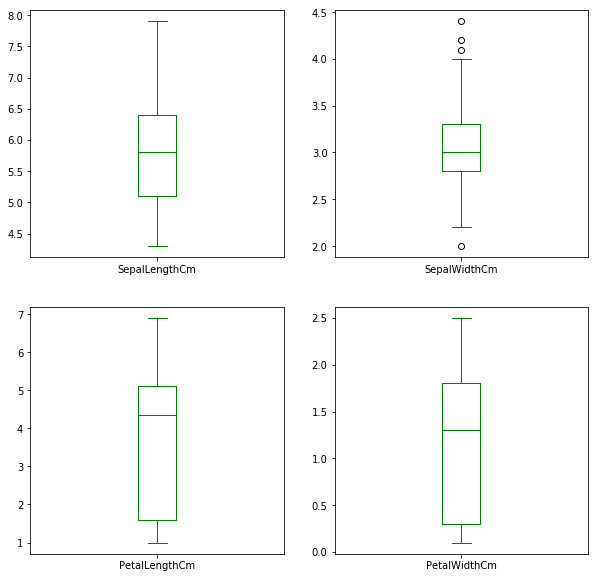

In [25]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,color="green", figsize=(10,10))
plt.show()

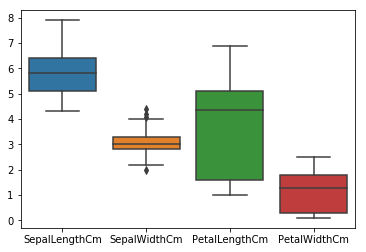

In [26]:
sns.boxplot(data=dataset)

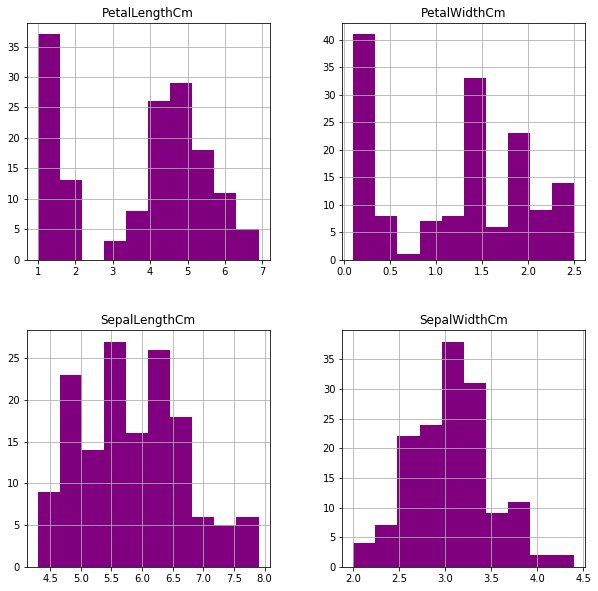

In [27]:
# histograms
dataset.hist(color="purple",figsize=(10,10))
plt.show()

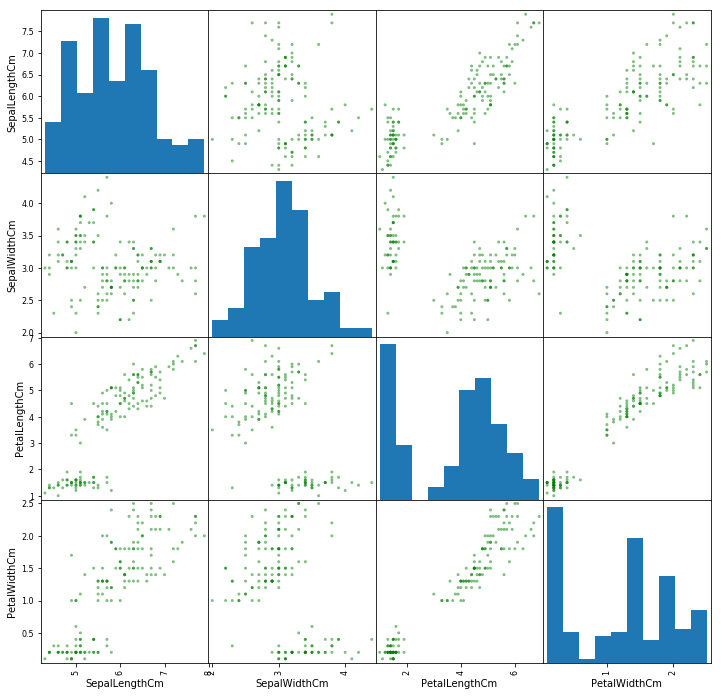

In [28]:
# scatter plot matrix
scatter_matrix(dataset,color="green",figsize =(12,12))
plt.show()

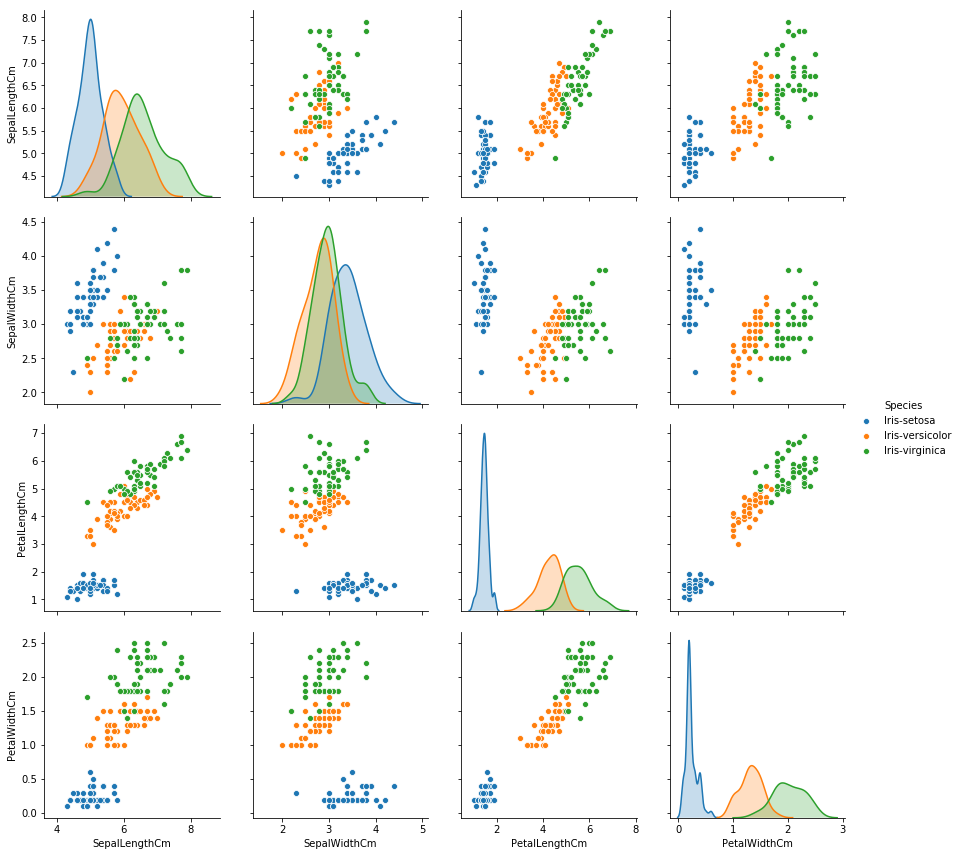

In [29]:
sns.pairplot(dataset, hue="Species", height=3, diag_kind="kde")
plt.show()

In [30]:
dataset.Species = dataset.Species.astype('category')

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [32]:
dataset.Species.cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [33]:
dataset.Species = dataset.Species.cat.codes

In [34]:
dataset.Species.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

In [35]:
dataset.Species.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int8

In [ ]:
dataset.columns.values

In [36]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, 
random_state=42)

In [37]:
X_train.shape[0],Y_train.shape[0]

(120, 120)

In [38]:
X_validation.shape[0],Y_validation.shape[0]

(30, 30)

In [39]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_validation = scalar.transform(X_validation)

In [40]:
X_train[:5]

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358]])

In [41]:
logis = LogisticRegression()
logis.fit(X_train,Y_train)
prediction=logis.predict(X_validation)
print("logistic regression::\n",confusion_matrix(Y_validation,prediction),"\n")

logistic regression::
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]] 



In [42]:
svm = SVC()
svm.fit(X_train,Y_train)
prediction=svm.predict(X_validation)
print("SVM ::\n",confusion_matrix(Y_validation,prediction),"\n")

SVM ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [43]:
    knn = KNeighborsClassifier()
    knn.fit(X_train,Y_train)
    prediction=knn.predict(X_validation)
    print("KNN ::\n",confusion_matrix(Y_validation,prediction),"\n")

KNN ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [44]:
dTmodel = DecisionTreeClassifier()
dTmodel.fit(X_train,Y_train)
prediction=dTmodel.predict(X_validation)
print("DecisionTree ::\n",confusion_matrix(Y_validation,prediction),"\n")

DecisionTree ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [45]:
rForest = RandomForestClassifier()
rForest.fit(X_train,Y_train)
prediction=rForest.predict(X_validation)
print("RandomForest ::\n",confusion_matrix(Y_validation,prediction),"\n")

RandomForest ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [46]:
grBoosting = GradientBoostingClassifier()
grBoosting.fit(X_train,Y_train)
prediction=grBoosting.predict(X_validation)
print("GradientBoosting ::\n",confusion_matrix(Y_validation,prediction))

GradientBoosting ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [47]:
#using cross_val_score
logis = LogisticRegression()
    
scores = cross_val_score(logis,X_train,Y_train,cv=5)
print("Accuracy for logistic regresion: mean: {0:.2f} 2sd: {1:.2f}".format(scores.mean(),scores.std() * 2))
print("Scores::",scores)
print("\n")

scores2 = cross_val_score(svm,X_train,Y_train,cv=5)
print("Accuracy for SVM: mean: {0:.2f} 2sd: {1:.2f}".format(scores2.mean(),scores2.std() * 2))
print("Scores::",scores)
print("\n")

scores3 = cross_val_score(knn,X_train,Y_train,cv=5)
print("Accuracy for KNN: mean: {0:.2f} 2sd: {1:.2f}".format(scores3.mean(),scores3.std() * 2))
print("Scores::",scores)
print("\n")

scores4 = cross_val_score(dTmodel,X_train,Y_train,cv=5)
print("Accuracy for Decision Tree: mean: {0:.2f} 2sd: {1:.2f}".format(scores4.mean(),scores4.std() * 2))
print("Scores::",scores4)
print("\n")

scores5 = cross_val_score(rForest,X_train,Y_train,cv=5)
print("Accuracy for Random Forest: mean: {0:.2f} 2sd: {1:.2f}".format(scores5.mean(),scores5.std() * 2))
print("Scores::",scores5)
print("\n")

scores6 = cross_val_score(grBoosting,X_train,Y_train,cv=5)
print("Accuracy for Gradient Boosting: mean: {0:.2f} 2sd: {1:.2f}".format(scores6.mean(),scores6.std() * 2))
print("Scores::",scores6)
print("\n")

Accuracy for logistic regresion: mean: 0.88 2sd: 0.15
Scores:: [0.8        0.95833333 0.79166667 0.95833333 0.86956522]


Accuracy for SVM: mean: 0.96 2sd: 0.09
Scores:: [0.8        0.95833333 0.79166667 0.95833333 0.86956522]


Accuracy for KNN: mean: 0.92 2sd: 0.11
Scores:: [0.8        0.95833333 0.79166667 0.95833333 0.86956522]


Accuracy for Decision Tree: mean: 0.94 2sd: 0.07
Scores:: [0.96       0.95833333 0.875      0.95833333 0.95652174]


Accuracy for Random Forest: mean: 0.93 2sd: 0.15
Scores:: [0.96       0.95833333 0.79166667 1.         0.95652174]


Accuracy for Gradient Boosting: mean: 0.94 2sd: 0.07
Scores:: [0.96       0.95833333 0.875      0.95833333 0.95652174]




In [48]:
#Here we are testing various predictive algorithms from scikit-learn
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.883333 (0.076376)
LDA: 0.975000 (0.038188)
KNN: 0.941667 (0.053359)
CART: 0.933333 (0.062361)
Random Forest: 0.950000 (0.055277)
Gradient Boosting: 0.933333 (0.062361)
NB: 0.950000 (0.055277)
SVM: 0.950000 (0.055277)


In [49]:
clf = RandomForestClassifier()
#Random Forest
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 4),
              "min_samples_split": sp_randint(2, 4),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train, Y_train)
print(random_search.best_params_)
print(random_search.best_estimator_)
confusion_matrix(Y_validation,random_search.predict(X_validation))

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 3}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [50]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 4],
              "min_samples_split": [2, 3, 4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
confusion_matrix(Y_validation,grid_search.predict(X_validation))

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 4}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

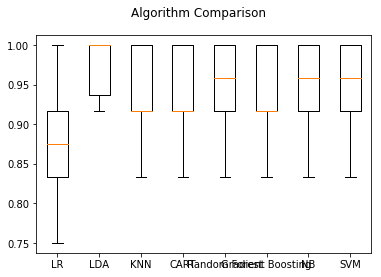

In [51]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [53]:
# Make predictions on validation dataset
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
#Input Vector 
X_new = numpy.array([[1, 2.1, 4, 0.2], [  4.7, 3, 1.3, 0.2 ],[  3.1, 1, 2.3, 0.3 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (3, 4)


In [55]:
prediction = svn.predict(X_new)

In [56]:
#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [2. 2. 2.]


In [57]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder_t = label_encoder.fit(Y_train)
label_encoder_v = label_encoder.fit(Y_validation)
label_encoded_yt = label_encoder.transform(Y_train)
label_encoded_yv = label_encoder.transform(Y_validation)

In [58]:
dtrain = xgb.DMatrix(X_train, label=label_encoded_yt)
dtest = xgb.DMatrix(X_validation, label=label_encoded_yv)

In [59]:
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, label_encoded_yt, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_validation, label_encoded_yv, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[08:01:01] 120x4 matrix with 480 entries loaded from dtrain.svm
[08:01:01] 30x4 matrix with 120 entries loaded from dtest.svm


In [60]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [61]:
bst = xgb.train(param, dtrain, num_round)

In [62]:
# To see how the model looks you can also dump it in human readable form:
# bst.dump_model('dump.raw.txt')

In [63]:
preds = bst.predict(dtest)
preds


array([[0.00563804, 0.97755206, 0.01680986],
       [0.98254657, 0.01395846, 0.00349498],
       [0.00363749, 0.00615226, 0.9902103 ],
       [0.00564738, 0.97917044, 0.0151822 ],
       [0.00540075, 0.93640935, 0.0581899 ],
       [0.98607963, 0.0104128 , 0.00350755],
       [0.00504762, 0.98975813, 0.00519427],
       [0.0156953 , 0.06653062, 0.917774  ],
       [0.0063378 , 0.94877166, 0.04489058],
       [0.00438964, 0.99041265, 0.0051977 ],
       [0.01785045, 0.07566603, 0.9064835 ],
       [0.99054164, 0.00561866, 0.00383973],
       [0.98254657, 0.01395846, 0.00349498],
       [0.990855  , 0.00562044, 0.00352453],
       [0.990855  , 0.00562044, 0.00352453],
       [0.00435676, 0.9863815 , 0.00926175],
       [0.0028351 , 0.00545694, 0.991708  ],
       [0.00506935, 0.98753244, 0.00739827],
       [0.00435527, 0.98265946, 0.01298527],
       [0.00283684, 0.00484793, 0.9923152 ],
       [0.990855  , 0.00562044, 0.00352453],
       [0.01177546, 0.08546324, 0.90276134],
       [0.

In [64]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])

In [65]:
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import precision_score
print(precision_score(label_encoded_yv, best_preds, average='macro'))

1.0


In [67]:
from sklearn.externals import joblib
joblib.dump(bst, 'bst_model.pkl', compress=True)
# bst = joblib.load('bst_model.pkl') # load it later

['bst_model.pkl']